In [1]:


# maths library for matrix manipulation
import numpy as np

# matplotlib is a library for plotting things inside Python
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# This is a library for reading and writing image files

from skimage import io

In [3]:
# a library for finding files
from scipy.spatial import distance
from sklearn import decomposition
import glob 

In [4]:


JPGList = glob.glob('/home/impett/Downloads/Annunc2/AnnuncsJun18/*/*.jpg')




In [5]:
len(JPGList)

505

In [6]:
allList = JPGList #[:100]

In [7]:
from skimage import feature

In [8]:
from skimage import transform

In [9]:
import tqdm

In [10]:
from scipy.spatial import distance

In [11]:

n_components = 50


In [12]:
import pickle

In [13]:
search = pickle.load(open( "save.p", "rb" ) )

In [14]:
ipca = search['pca'] 
imf = search['features']  
imCrops = search['crops']

In [15]:
def showImSection(mylist):
    myim = io.imread(mylist[0])
    return myim[mylist[1]:mylist[2],mylist[3]:mylist[4]]

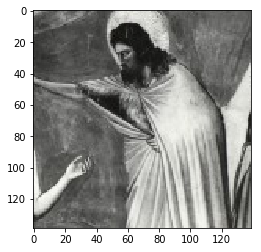

In [16]:
plt.imshow(showImSection(imCrops[3]))

In [17]:
L = np.shape(imf)[0]

<IPython.core.display.Javascript object>


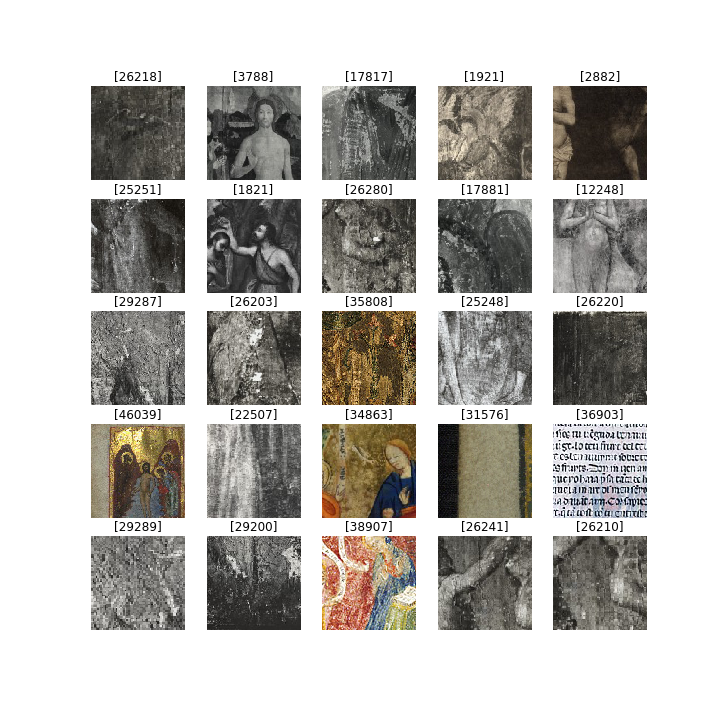

In [33]:
testIm = io.imread(allList[np.random.randint(50)])
%matplotlib nbagg
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(testIm)
coords = []
def onclick(event):
    coords.append( [event.xdata, event.ydata])
    
    if(len(coords) == 2):
        
        xmin = int(coords[0][0])
        ymin = int(coords[0][1])
        xmax = int(coords[1][0])
        ymax = int(coords[1][1])
        print([xmin, xmax, ymin, ymax])
        queryIm = testIm[ymin:ymax,xmin:xmax,:]
        # %matplotlib inline
        # plt.imshow(queryIm)
        queryIm = transform.resize(queryIm,(256,256,3))
        queryF = feature.hog(queryIm,  pixels_per_cell=(16,16)  )
        # querydistances = distance.cdist(imf,queryF.reshape(1,-1))

        qf_pca = ipca.transform(queryF.reshape(1,-1))
        querydistances = distance.cdist(imf,qf_pca)
        # %matplotlib nbagg
        idx = np.argsort(querydistances,axis=0)
        for i in range(25):
            plt.subplot(5,5,i+1)
            plt.imshow( showImSection(imCrops[  [idx[i][0]][0]      ]))
            plt.axis('off')
        #     plt.title('distance = ' + str(querydistances[idx[i][0]]))
            plt.title('' + str(idx[i]))


cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [ ]:

xmin = int(coords[0][0])
ymin = int(coords[0][1])
xmax = int(coords[1][0])
ymax = int(coords[1][1])
print([xmin, xmax, ymin, ymax])
queryIm = testIm[ymin:ymax,xmin:xmax,:]
# %matplotlib inline
# plt.imshow(queryIm)
queryIm = transform.resize(queryIm,(256,256,3))
queryF = feature.hog(queryIm,  pixels_per_cell=(16,16)  )

In [ ]:
# querydistances = distance.cdist(imf,queryF.reshape(1,-1))

qf_pca = ipca.transform(queryF.reshape(1,-1))
querydistances = distance.cdist(imf,qf_pca)

In [ ]:
# %matplotlib nbagg
plt.figure(figsize=(10,10))
idx = np.argsort(querydistances,axis=0)
# fig,ax 

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( showImSection(imCrops[  [idx[i][0]][0]      ]))
    plt.axis('off')
#     plt.title('distance = ' + str(querydistances[idx[i][0]]))
    plt.title('' + str(idx[i]))

coords = []
def onclick(event):
    coords.append( event)

cid = fig.canvas.mpl_connect('button_press_event', onclick)